In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [33]:
def get_tuned_params_dict(lines):
    
    tuned_params = {}
    for hp in lines[6:]:
        if 'tuner/epochs' in hp:
            break

        hp_name, hp_choice = hp.split(':')
        hp_choice = hp_choice[1:-1]

        if hp_name in ["dropout", "learning_rate"]:
            hp_choice = float(hp_choice)
        else:
            hp_choice = int(hp_choice)

        tuned_params[hp_name] = hp_choice

    if tuned_params['num_layers'] == 2:
        tuned_params['layer_2_units'] = 0

    elif tuned_params['num_layers'] == 1:
        tuned_params['layer_1_units'] = 0
        tuned_params['layer_2_units'] = 0
    
    return tuned_params


def get_gnn_neurons_hp(cancer, strategy, gnn):
    
    neurons = {
        "layer_0_units": [],
        "layer_1_units": [],
        "layer_2_units": []
    }

    for th in ["001", "005", "01", "025", "05", "075", "09", "095", "099"]:
        
        file = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}/{strategy}/{th}/{gnn}_tunner_best_results.txt"
        with open(file) as f:
            lines = f.readlines()
        tuned_params = get_tuned_params_dict(lines)

        neurons['layer_0_units'].append(tuned_params['layer_0_units'])
        neurons['layer_1_units'].append(tuned_params['layer_1_units'])
        neurons['layer_2_units'].append(tuned_params['layer_2_units'])

    df = pd.DataFrame(neurons, index=["0.01", "0.05", "0.1", "0.25", "0.5", "0.75", "0.9", "0.95", "0.99"])
    return df


def get_mlp_neurons_hp(cancer):
    
    file = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}/mlp/mlp_tunner_best_results.txt"
    with open(file) as f:
        lines = f.readlines()
    tuned_params = get_tuned_params_dict(lines)
    
    neurons = {}
    neurons['layer_0_units'] = [tuned_params['layer_0_units']]
    neurons['layer_1_units'] = [tuned_params['layer_1_units']]
    neurons['layer_2_units'] = [tuned_params['layer_2_units']]

    df = pd.DataFrame(neurons, index=["0.01", "0.05", "0.1", "0.25", "0.5", "0.75", "0.9", "0.95", "0.99"])
    return df

In [41]:
df_gat_coad_cgen = get_gnn_neurons_hp("COAD", "correlation", "gat")
df_gcn_coad_cgen = get_gnn_neurons_hp("COAD", "correlation", "gcn")
df_mlp_coad = get_mlp_neurons_hp("COAD")

Text(0.5, 1.0, 'GAT CGEN (COAD)')

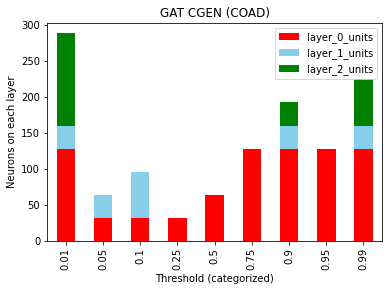

In [24]:
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Threshold (categorized)')
plt.ylabel('Neurons on each layer')
 
# title of plot
plt.title('GAT CGEN (COAD)')